# Uber Rider Churn Analysis -- data processing

##  Project overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users who signed up for an account in January 2014. The data was pulled several months later. 

## Dataset description

- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY­MM­DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY­MM­DD’ 
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## Load data and browse data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/raw_data.csv')

In [3]:
# Inspect dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Browse dataset
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [5]:
# Show summary stats
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [6]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

## Explore data

### Numeric variables

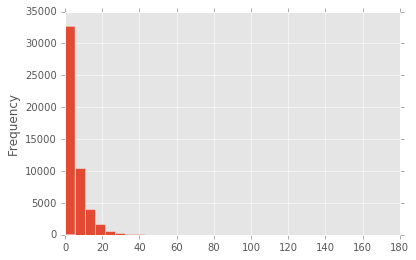

In [12]:
df['avg_dist'].plot.hist(bins = 30)

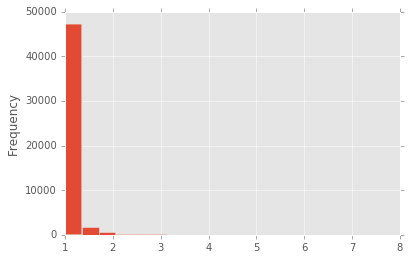

In [13]:
df['avg_surge'].plot.hist(bins=20)

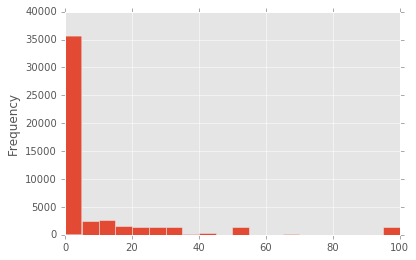

In [14]:
df['surge_pct'].plot.hist(bins=20)

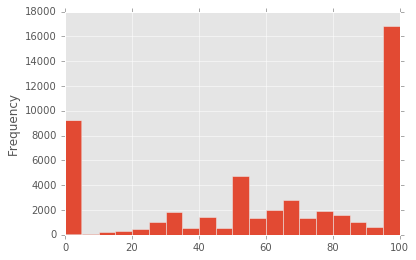

In [15]:
df['weekday_pct'].plot.hist(bins=20)

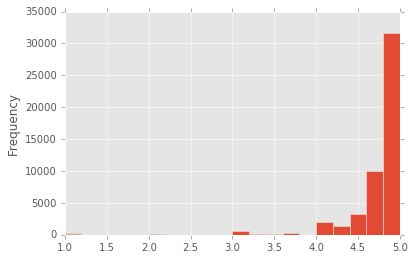

In [16]:
df['avg_rating_by_driver'].plot.hist(bins=20)

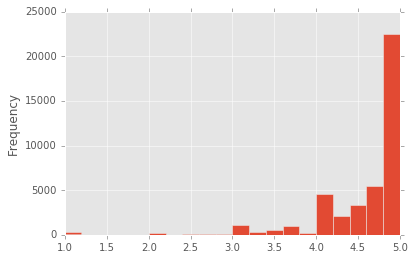

In [17]:
df['avg_rating_of_driver'].plot.hist(bins=20)

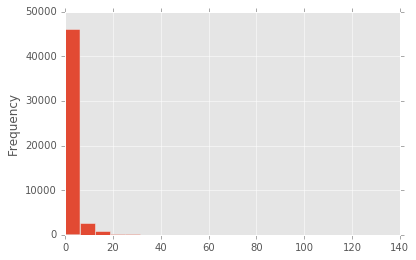

In [18]:
df['trips_in_first_30_days'].plot.hist(bins=20)

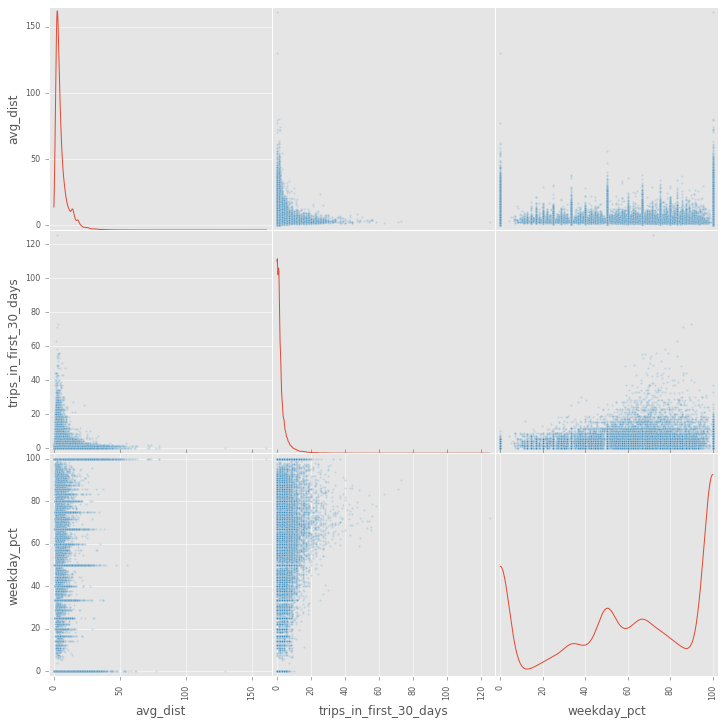

In [29]:
# Use scatter_matrix from Pandas
# kde is short for kenel density estimator, a non-parameter method to estimate probability density function
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], 
               alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

### Categorical variables

In [23]:
df['city'].value_counts(dropna = False)

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

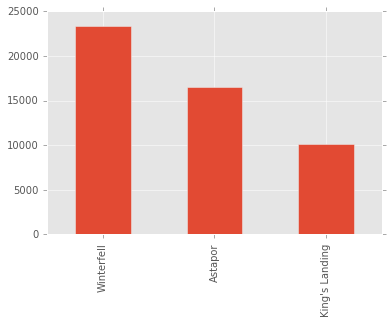

In [24]:
df['city'].value_counts().plot.bar()

In [25]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

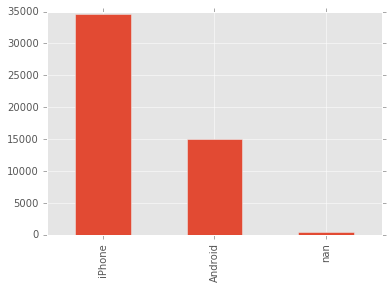

In [26]:
df['phone'].value_counts(dropna=False).plot.bar()

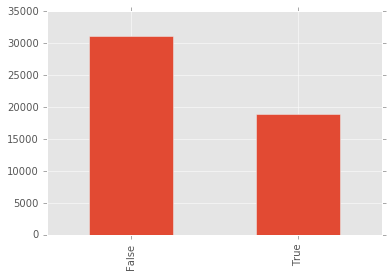

In [27]:
df['luxury_car_user'].value_counts().plot.bar()

## Clean data - dealing with missing values

In [30]:
# Count missing values by column
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64

#### Option 1: drop all rows that have missing values

In [ ]:
# df_dropna = df.dropna(axis=0)

In [ ]:
# df_dropna.info()

In [ ]:
# df_dropna.describe()

#### Option 2: fill missing values
    there are only 50000 records so I don't want to drop any information

In [31]:
# Make a copy of df, because you don't want to mess up with orignal df when you experiment stuff
df_fillna = df.copy()

In [32]:
# Fill missing value for phone
df_fillna['phone'] = df['phone'].fillna('no_phone')

In [35]:
# Fill missing values with median just for simplicity
df_fillna['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(), inplace = True)
df_fillna['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace = True)

In [36]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [37]:
df_fillna.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Decision
We decide to exclude data with missing value. 

In [38]:
df = df_fillna

## Transform data

### Time-series variables

In [39]:
# convert time-series information to datetime data type
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [40]:
df["last_trip_date"].head()

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

In [56]:
# construct a new df to experiment on the time-series 
df_timestamp = df[['last_trip_date', 'signup_date']].copy()

In [57]:
df_timestamp['count'] = 1

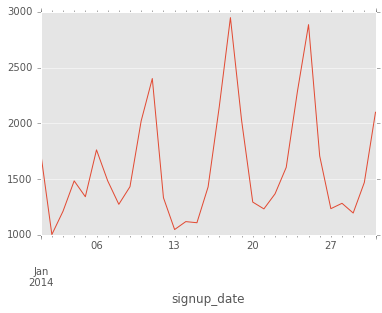

In [54]:
# df_timestamp = df_timestamp.set_index('signup_date')
# df_timestamp['count'].resample("1D").sum().plot()

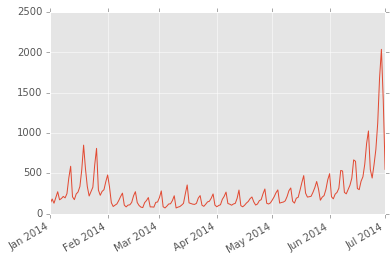

In [60]:
# df_timestamp = df_timestamp.set_index('last_trip_date')
# df_timestamp['count'].resample("1D").sum().plot()
df_timestamp['last_trip_date'].value_counts().plot()

In [62]:
# There might be some signal from day of week when a user signed up Uber, so let's create a column for that
df['signup_dayofweek'] = df['signup_date'].apply(lambda x: x.dayofweek)

In [63]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dayofweek
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Converting categorical variables

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
signup_dayofweek          50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


Categorical variables:
* city
* phone
* luxury_car_user
* signup_dow

#### Convert bool columns to int

In [66]:
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

In [67]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dayofweek
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


#### Encode categorical columns to numeric values

In [71]:
col_category = ['signup_dayofweek', 'city', 'phone']

In [72]:
df_dummies = pd.get_dummies(df[col_category], columns = col_category)

In [73]:
df_dummies

,signup_dayofweek_0,signup_dayofweek_1,signup_dayofweek_2,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [75]:
df = df.join(df_dummies)

In [76]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dayofweek_3,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [77]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'signup_dayofweek', u'signup_dayofweek_0',
       u'signup_dayofweek_1', u'signup_dayofweek_2', u'signup_dayofweek_3',
       u'signup_dayofweek_4', u'signup_dayofweek_5', u'signup_dayofweek_6',
       u'city_Astapor', u'city_King's Landing', u'city_Winterfell',
       u'phone_Android', u'phone_iPhone', u'phone_no_phone'],
      dtype='object')

## Define a label/target/outcome

Add churn indicator. Considered to churn if have not taken a trip in the last 30 days.

In [82]:
# Define churn: users did not take a trip during last 30 days, i.e. last trip date is earlier than 2014-06-01
# (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')).astype(int)
# df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1
# df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')).astype(int)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,signup_dayofweek_4,signup_dayofweek_5,signup_dayofweek_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1


In [83]:
df['churn'].mean()

0.62392

## EDA with label

### colored scatter_matrix

In [84]:
colors = ['red' if ix else 'blue' for ix in df['churn']]

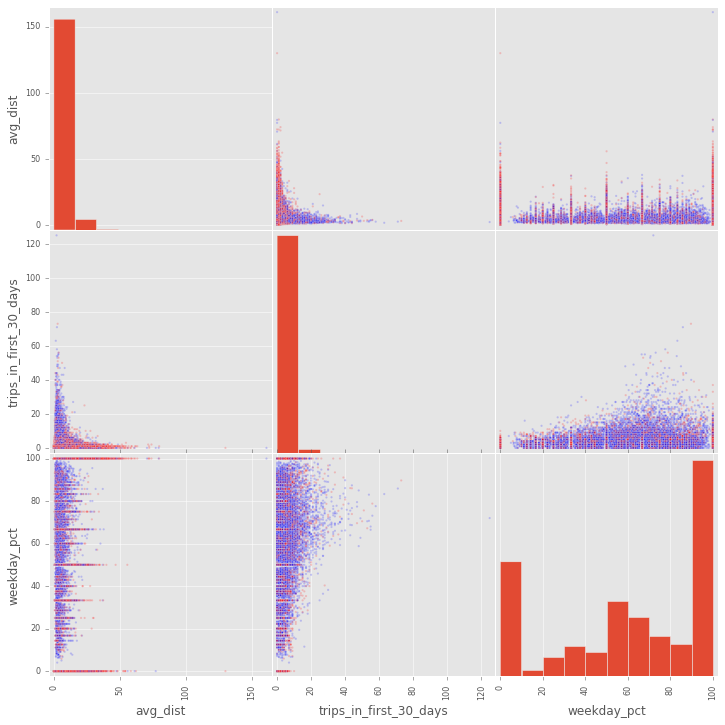

In [86]:
# scatter_matrix(df[[u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', 
#                   u'avg_surge', u'surge_pct', u'trips_in_first_30_days', u'weekday_pct']],
#                 alpha=0.2, figsize=(16, 16), diagonal='hist', c=colors)
scatter_matrix(df[[u'avg_dist', u'trips_in_first_30_days', u'weekday_pct']], alpha = 0.2, figsize = (12,12), diagonal = 'hist', c = colors)
plt.show()

### Explore churn rate split by features 

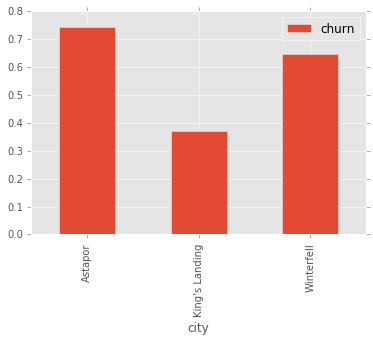

In [89]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

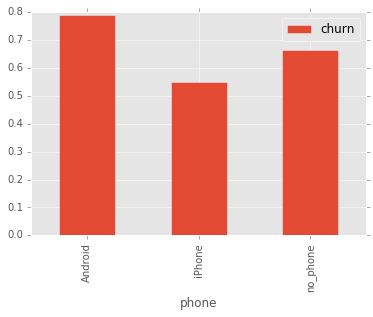

In [90]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

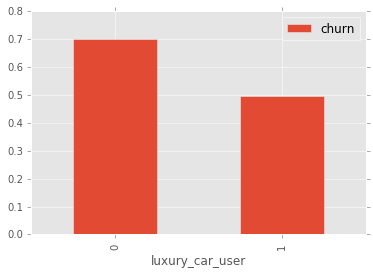

In [91]:
df[['luxury_car_user', 'churn']].groupby(['luxury_car_user']).mean().plot.bar()

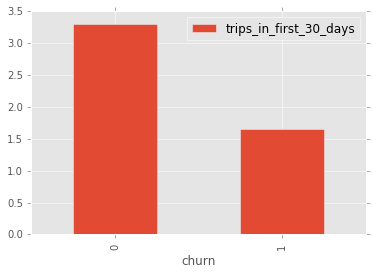

In [92]:
df[['trips_in_first_30_days', 'churn']].groupby(['churn']).mean().plot.bar()

In [93]:
is_active = df['churn'] == 0

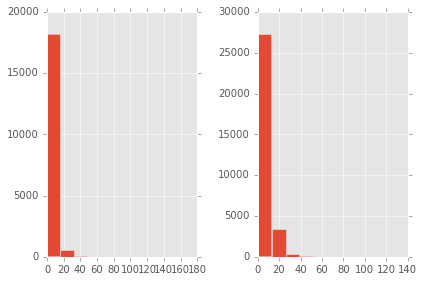

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df[is_active]['avg_dist'].values)
axes[1].hist(df[~is_active]['avg_dist'].values)
fig.tight_layout()
plt.show()

#### Abstract out the plotting machine

In [95]:
def hist_active_vs_churn(df, col_name):
    is_active = df['churn'] == 0
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].hist(df[is_active][col_name].values)
    axes[0].set_title("active users")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("counts")
    axes[1].hist(df[~is_active][col_name].values)
    axes[1].set_title("churned users")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("counts")
    fig.tight_layout()
    plt.show()

In [96]:
df.columns

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct', u'signup_dayofweek', u'signup_dayofweek_0',
       u'signup_dayofweek_1', u'signup_dayofweek_2', u'signup_dayofweek_3',
       u'signup_dayofweek_4', u'signup_dayofweek_5', u'signup_dayofweek_6',
       u'city_Astapor', u'city_King's Landing', u'city_Winterfell',
       u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'churn'],
      dtype='object')

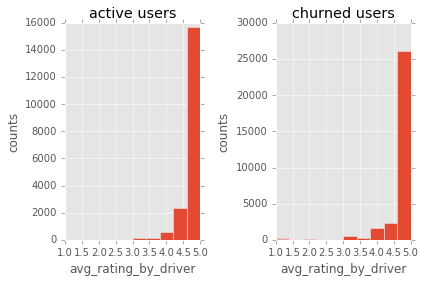

In [97]:
hist_active_vs_churn(df, col_name=u'avg_rating_by_driver')

In [98]:
cols = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge']

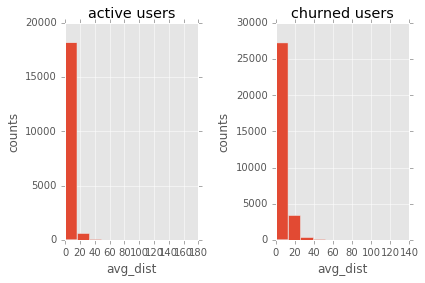

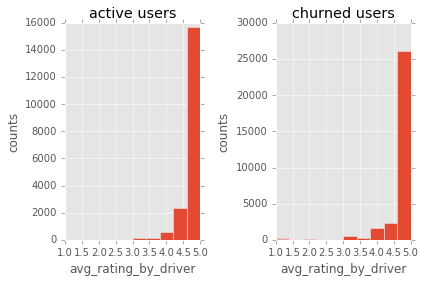

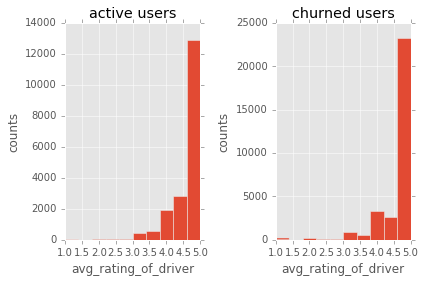

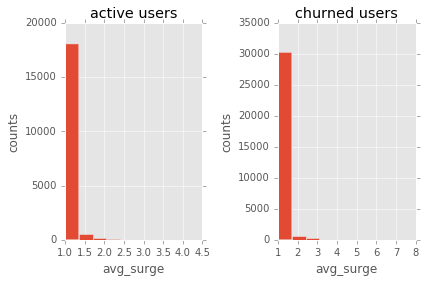

In [99]:
for col in cols:
    hist_active_vs_churn(df, col_name=col)

## Save cleaned data to csv file

### Select which columns to be saved

In [104]:
selected_columns = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone', u'signup_dayofweek_0', 
                     u'signup_dayofweek_1', u'signup_dayofweek_2', u'signup_dayofweek_3', u'signup_dayofweek_4', 
                     u'signup_dayofweek_5', u'signup_dayofweek_6', u'churn']

### Save to csv file


In [105]:
cleaned_data_csv = 'data/cleaned_data.csv'
df[selected_columns].to_csv(cleaned_data_csv, index=False)